## When I read [this fun post](https://www.littlemissdata.com/blog/lacroix) from [Little Miss Data](https://www.littlemissdata.com/), I knew what I had to do: merge the famous [Rick Astley pie chart](https://www.memecenter.com/fun/2120181/rick-rolled-by-a-pie-chart) with an animated GIF of the Rickster himself!

## Yeah, yeah, I know the meme's 100 Internet years old, but I thought it was clever so I gave it a try.  

## One big problem I encountered was that I couldn't figure out how to get Python to load an animated GIF file.  In Little Miss Data's R example, she saved off her charts as PNG files then used them as backgrounds on which to load animated GIFs.  I couldn't figure out how to replicate that in Python, so I cheated a little bit: I loaded a static image of Rick on top of my pie chart and then ran that through a loop where I slight rotated Rick with each iteration and saved the result.  Then, with the [imageio](https://imageio.github.io/) package, I saved all those images together into a final animated GIF.

## You'll probably notice that my rotation of Rick's head is not very fluid.  Ideally, I would identify the center point of Rick's picture and then do the calculations to pivot his head around that point.  I really didn't want to spend the time figuring out that calculation, so I get kind of a crazy rotating Rick.  I'll leave that to someone smarter.

### Step 1: Load my packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy import ndimage
from imageio import imread, mimsave
import glob, os

%matplotlib inline
plt.style.use('fivethirtyeight')

### Step 2: Create the dataframe from which I'll generate my pie chart

In [68]:
data = [['Give you up', 30], 
        ['Let you down', 20], 
        ['Run around \nand dessert you', 20], 
        ['Make you cry', 15], 
        ['Say goodbye', 10], 
        ['Tell a lie \nand \nhurt you', 5]]

headers = ['thing', 'percentage']

df = pd.DataFrame(data, columns=headers)

### Step 3: Experiment with matplotlib's animation library.  Some folks seemed to have found success with the FuncAnimation function, but I couldn't get it to animate my pie chart.

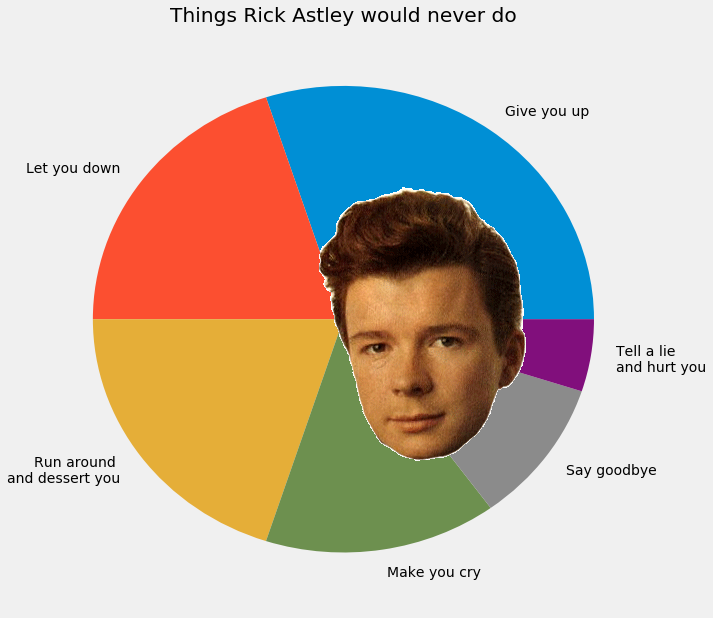

In [66]:
rot_data = [[0, 280, 150], [36, 280, 150], [72, 280, 150], [108, 280, 150], [144, 280, 150], [180, 280, 150], 
            [216, 280, 150], [252, 280, 150], [288, 280, 150], [324, 280, 150]]

fig, ax = plt.subplots()
rr = plt.imread('rr2.gif')
df.plot.pie(y='percentage', labels=df.thing, figsize=(10, 10), legend=False, 
            title='Things Rick Astley would never do', ax=ax)
ax.set_ylabel('')
rr = ndimage.rotate(rr, 0)
_ = ax.figure.figimage(rr, 280, 150, zorder=1) #, 40, 40, alpha=.15, zorder=1)

def update(i):
    img = plt.imread('rr2.gif')
    rr = ndimage.rotate(img, rot_data[i][0])
    _ = ax.figure.figimage(rr, rot_data[i][1], rot_data[i][2], zorder=1)
    return rr, ax
    
anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
#anim.save('pie.gif', dpi=80, writer='imagemagick')
plt.show()

### Step 4: Do it the lame way.  Alright, I give up: let's just run my pie chart through a loop where I rotate Rick's head slightly with each iteration and save the results.  Afterwards, I'll use imageio to glue all those images together into one animated GIF.

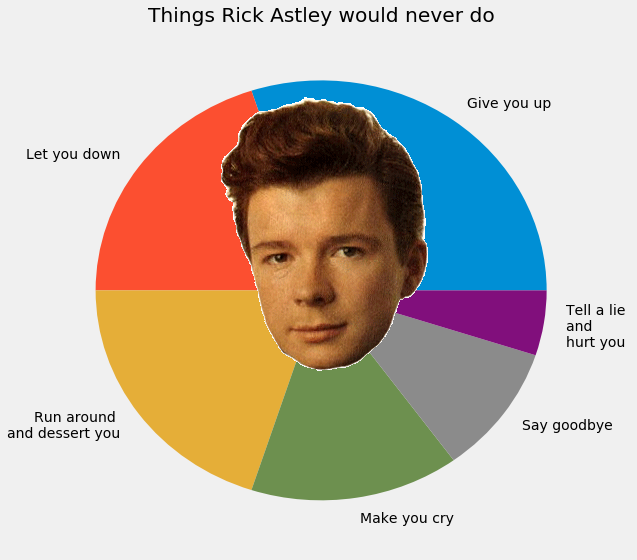

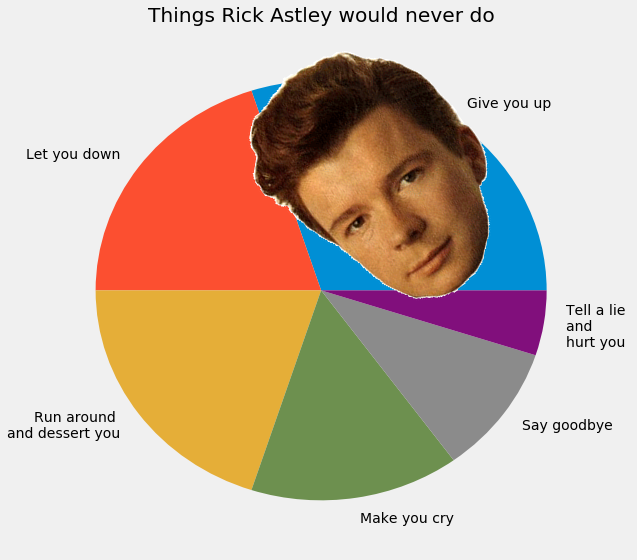

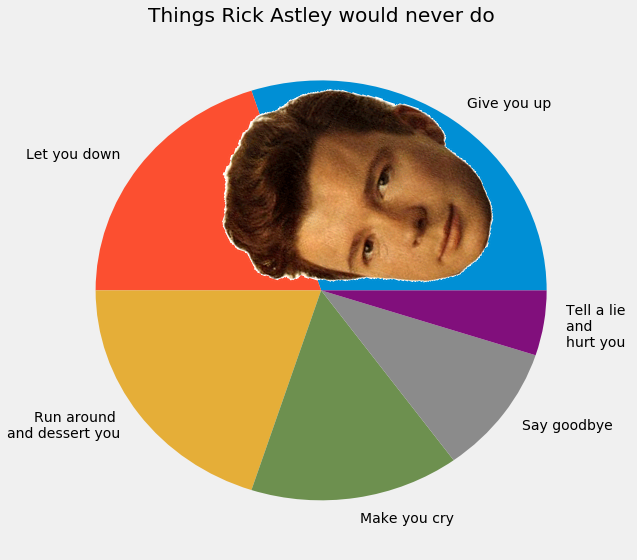

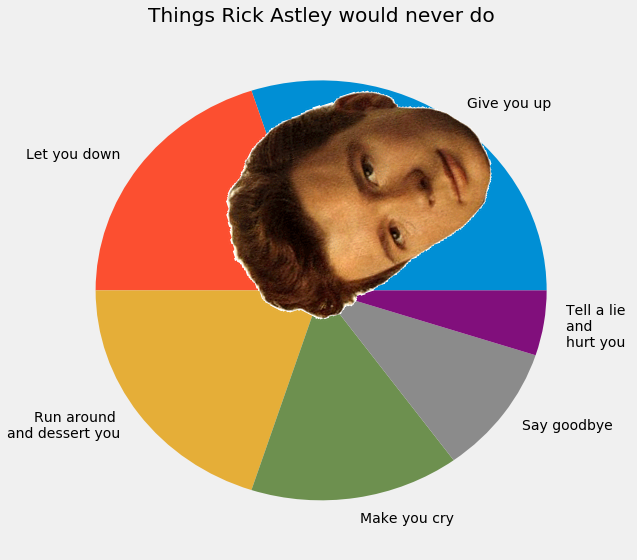

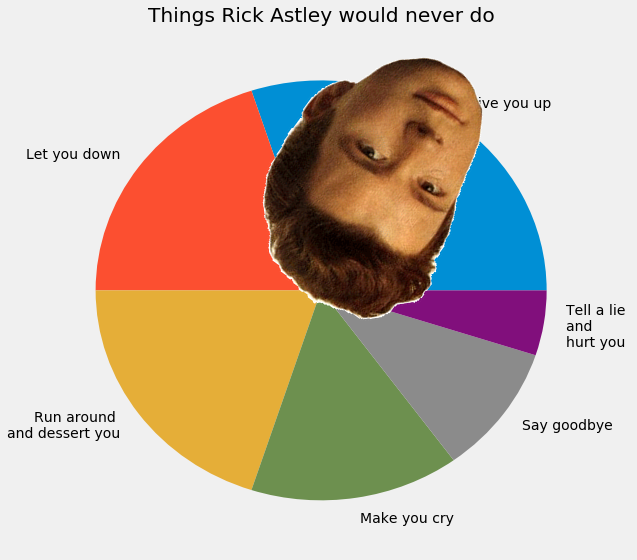

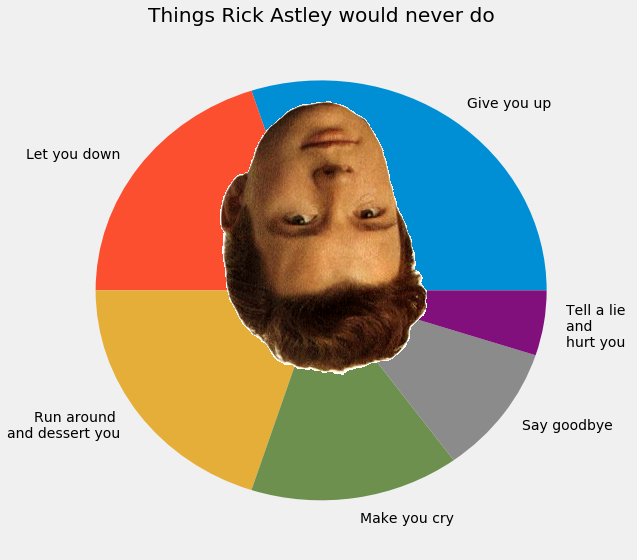

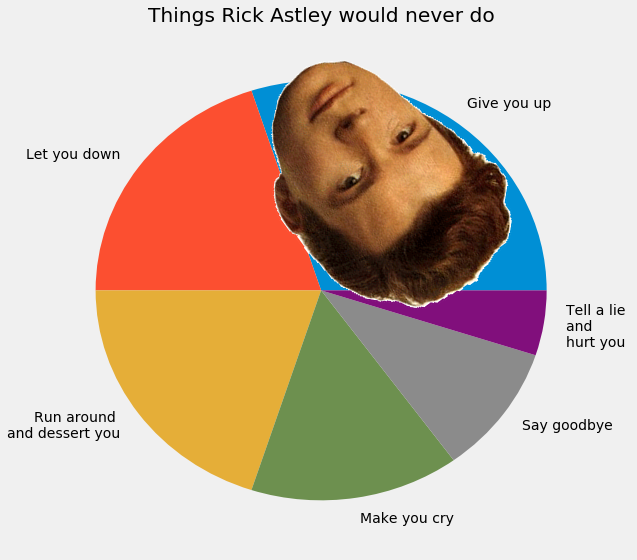

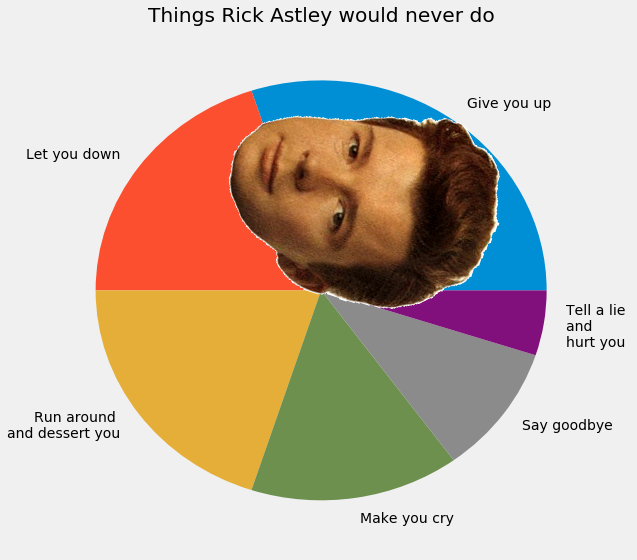

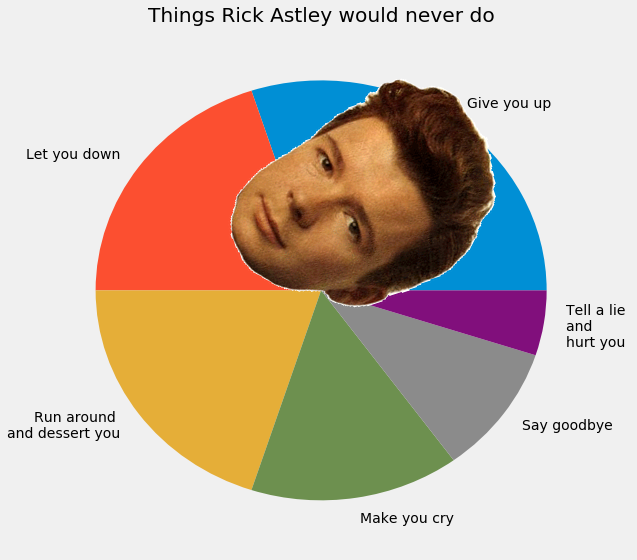

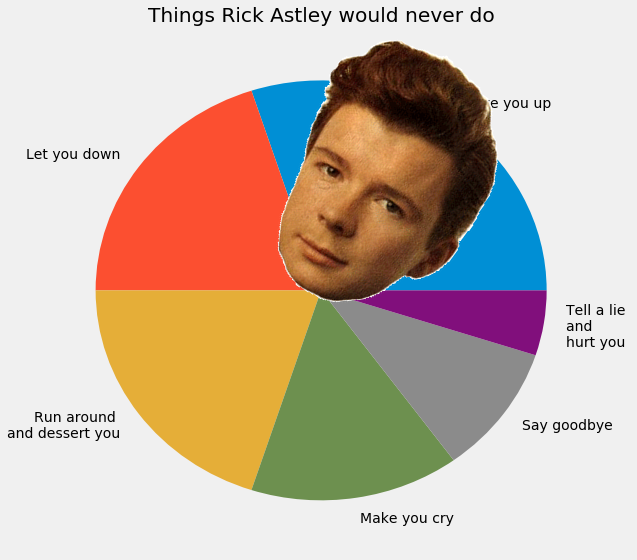

In [70]:
[os.remove(f) for f in glob.glob('fig_*.png')]
pngs = []

for i in np.arange(0, 10):
    fig, ax = plt.subplots()
    img = plt.imread('rr2.gif')
    img_w, img_h, x = img.shape
    df.plot.pie(y='percentage', labels=df.thing, figsize=(9, 9), legend=False, 
                title='Things Rick Astley would never do', ax=ax)
    ax.set_ylabel('')
    fig_w, fig_h = fig.get_size_inches()*fig.dpi
    rr = ndimage.rotate(img, i*36)
    _ = ax.figure.figimage(rr, fig_w/2 - img_w/2, fig_h/2 - img_h/2, zorder=1)
    fig.savefig('fig_{0}.png'.format(i))
    pngs.append('fig_{0}.png'.format(i))
    
images = []
for png in pngs:
    img = imread(png)
    images.append(img)
mimsave('rr_final.gif', images)